# Arcface Experiments

In [3]:
from thirdparty import insightface_inference
import cv2


In [4]:
from numpy.linalg import norm as l2norm

def normed_embedding(embedding):
    return embedding / l2norm(embedding)


In [5]:
reg_model = insightface_inference.model_zoo.get_model(
    "ckpts/models/buffalo_l/w600k_r50.onnx", providers=["CUDAExecutionProvider"]
)
reg_model.prepare(ctx_id=1)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


In [6]:
import pandas as pd
import os
import sys
import numpy as np
from glob import glob

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


def read_txt(path):
    with open(path, "r") as f:
        lines = f.readlines()
        lines = [line.strip().split(",") for line in lines]
        return lines


def load_image(img_path):
    img_arr = cv2.imread(img_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)


## Reload ONNX Pretrained Weights

100%|██████████| 200/200 [00:07<00:00, 25.17it/s]


(200, 512)


Text(0.5, 1.0, 'L2Normed Facial embeddings with ONNX weights')

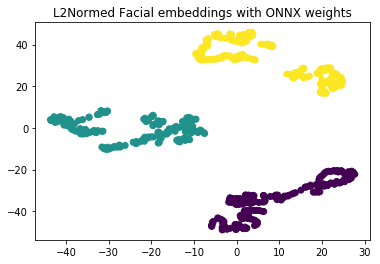

In [8]:
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)
# print(feats_1_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title('L2Normed Facial embeddings with ONNX weights')

100%|██████████| 200/200 [00:07<00:00, 25.58it/s]


(200, 512)


Text(0.5, 1.0, 'Facial embeddings with ONNX weights')

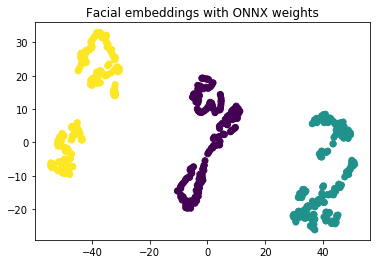

In [9]:
## W/o normalization
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)
# print(feats_1_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title('Facial embeddings with ONNX weights')

## Pytorch Pretrained Weights

In [10]:
import torch
import torch.nn as nn
from thirdparty.insightface.recognition.arcface_torch.backbones import iresnet50
import cv2
from albumentations.core.transforms_interface import ImageOnlyTransform
import numpy as np


class ArcFaceTransform(ImageOnlyTransform):
    def __init__(self, input_size, always_apply=True, p=1.0):
        super(ArcFaceTransform, self).__init__(always_apply, p)
        self.input_size = input_size  # (112, 112)
        self.input_mean = 127.5
        self.input_std = 127.5

    def apply(self, img, **params):
        # img = cv2.resize(img, self.input_size)
        img = cv2.dnn.blobFromImages(
            [img],
            1.0 / self.input_std,
            self.input_size,
            (self.input_mean, self.input_mean, self.input_mean),
            swapRB=False,
        )[0]
        return img.transpose((1, 2, 0))

    def get_transform_init_args_names(self):
        return "input_size"


class ArcFaceIRes50(nn.Module):
    def __init__(self, ckpt=None):
        super().__init__()
        self.backbone = iresnet50()
        if ckpt is not None:
            state_dict = torch.load(ckpt)
            print(self.backbone.load_state_dict(state_dict))
        self.input_mean = 127.5
        self.input_std = 127.5

    def get_feat(self, imgs):
        if not isinstance(imgs, list):
            imgs = [imgs]
        input_size = self.input_size

        blob = cv2.dnn.blobFromImages(
            imgs,
            1.0 / self.input_std,
            input_size,
            (self.input_mean, self.input_mean, self.input_mean),
            swapRB=True,
        )
        net_out = self.session.run(self.output_names, {self.input_name: blob})[0]
        return net_out

    def forward(self, x):
        return self.backbone(x)
        # blob = (batch_data - self.input_mean) / self.input_std
        # net_out = self.session.run(self.output_names, {self.input_name: blob})[0]

    def get_feat(self, x):
        with torch.no_grad():
            emb = self(x).detach().cpu().numpy()
        return emb


In [11]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


transform = A.Compose(
    [
        A.Resize(height=112, width=112),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        ArcFaceTransform(input_size=(112, 112)),
        ToTensorV2(),
    ]
)

img_path = "/mnt/DATA2/congvm/Affwild2/cropped_aligned/4-30-1920x1080/00002.jpg"
img_arr = cv2.imread(img_path)

img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
x1 = transform(image=img_arr_rgb)["image"].unsqueeze(0)
print(x1.shape)


torch.Size([1, 3, 112, 112])


In [12]:
model_r50 = ArcFaceIRes50(ckpt="ckpts/glint360k_cosface_r50_fp16_0.1_backbone.pth")
_ = model_r50.eval()
_ = model_r50.cuda()

<All keys matched successfully>


100%|██████████| 200/200 [00:01<00:00, 188.30it/s]


(200, 512)


Text(0.5, 1.0, 'Embedding with L2Norm')

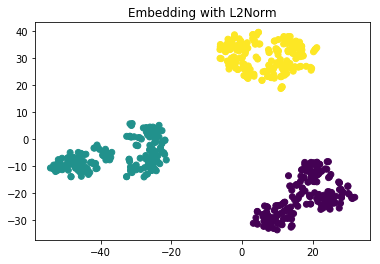

In [13]:
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats_2.append(features)

feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title("Embedding with L2Norm")


100%|██████████| 200/200 [00:01<00:00, 191.62it/s]


(200, 512)


Text(0.5, 1.0, 'Embedding w/o L2Norm')

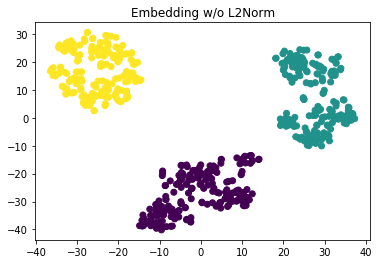

In [14]:
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title('Embedding w/o L2Norm')